# Capstone Project - Predicting Hosuing Prices in Moscow

<h3>Import of important libraries</h3>
<p>Those libraries are needed for further analyis</p> 

<p>Loading the datasets:</p>
    <ul><li><p>train.csv</p></li>
    <li><p>test.csv</p></li>
    <li><p>macro.csv</p></li></ul>

In [38]:
%pylab inline
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)

import pandas as pd 
import numpy as np

import xgboost as xgb

import missingno as msn

cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Wignand\Miniconda3\envs\py35\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [39]:
#loading train dataset
with open("train.csv", 'r') as f:
    train_df = pd.read_csv(f)
#loading test dataset
with open("test.csv", 'r') as f:
    test_df = pd.read_csv(f)
    #loading macro dataset
with open("macro.csv", 'r') as f:
    macro_df = pd.read_csv(f)

# Part 1 - Prepocessing

### So before we go into in depth analysis of the data lets have a first quick at the data 

In [40]:
display(train_df.head())
display(test_df.head())
display(macro_df.head())

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [41]:
display(train_df.shape)
display(train_df.describe())
display(test_df.shape)
display(test_df.describe())
display(macro_df.shape)
display(macro_df.describe())

(30471, 292)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


(7662, 291)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
count,7662.000000,7662.000000,6486.000000,7662.000000,7662.000000,7662.000000,6613.000000,7662.000000,7662.000000,6968.000000,...,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,34304.500000,53.701164,32.660037,7.652571,12.591099,1.854216,1820.888099,1.876403,6.938662,1.985792,...,69.532890,35.777865,12.152310,2.007439,16.749152,33.109371,0.412425,9.639650,56.235839,6.330723
std,2211.973214,20.104320,22.737855,5.099418,6.659291,1.517171,552.993964,0.835665,25.579688,0.820086,...,129.533773,76.524992,29.590097,5.664540,30.706709,49.734993,0.608938,21.499687,47.632547,4.956223
min,30474.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32389.250000,39.200000,19.900000,4.000000,9.000000,1.000000,1966.000000,1.000000,1.000000,1.000000,...,7.000000,2.000000,1.000000,0.000000,3.000000,10.000000,0.000000,0.000000,12.000000,2.000000
50%,34304.500000,50.410000,30.400000,7.000000,14.000000,1.000000,1982.000000,2.000000,7.000000,2.000000,...,27.000000,10.000000,2.000000,0.000000,7.000000,17.000000,0.000000,2.000000,51.000000,5.000000
75%,36219.750000,63.300000,41.800000,11.000000,17.000000,2.000000,2011.000000,2.000000,9.500000,3.000000,...,54.000000,25.000000,5.000000,1.000000,13.000000,29.000000,1.000000,7.000000,79.000000,11.000000
max,38135.000000,403.000000,869.000000,41.000000,48.000000,6.000000,2019.000000,19.000000,1968.000000,4.000000,...,643.000000,374.000000,145.000000,29.000000,150.000000,249.000000,2.000000,105.000000,212.000000,21.000000


(2484, 100)

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
count,2484.000000,2394.000000,2394.000000,2453.000000,2453.000000,2119.000000,2453.000000,2394.000000,2481.000000,2481.000000,...,730.000000,2191.000000,1461.00000,2191.000000,1461.000000,1826.000000,1461.00000,1461.000000,1826.000000,1826.000000
mean,86.467157,16993.230075,1.523726,407.808398,480.216347,110.122308,15.344006,16.846742,40.732406,50.444801,...,480.500000,8691.922410,580.51540,0.443398,1245.543463,349902.577766,25.06859,67.800034,36282.434830,230615.059255
std,27.528709,3187.074480,2.875659,65.895969,70.286366,14.818429,3.878104,16.988727,15.006583,13.905912,...,209.643641,1668.967502,37.98811,0.016061,162.526951,72146.453110,2.44944,5.168602,10761.669111,2944.879242
min,29.112500,9995.800000,-4.500000,315.100000,337.200000,86.721000,5.823000,-4.100000,27.276300,37.445400,...,271.000000,6221.000000,527.00000,0.410000,993.000000,269768.000000,22.37000,63.030000,22825.000000,226047.300000
25%,61.283300,14925.000000,0.400000,354.000000,438.400000,100.000000,12.785000,7.200000,30.508800,40.242600,...,271.000000,6943.000000,565.00000,0.439390,1240.000000,288177.000000,23.01000,64.120000,23587.000000,229294.800000
50%,101.416500,17442.100000,1.300000,393.000000,473.500000,108.299000,16.041000,10.500000,32.316500,42.862200,...,480.500000,8522.000000,603.00000,0.450700,1309.000000,329348.000000,23.01000,67.850000,42551.000000,230310.000000
75%,109.310000,19284.100000,4.100000,469.400000,520.700000,123.661000,18.076000,21.500000,53.752300,61.323700,...,690.000000,10311.000000,603.00000,0.453560,1309.000000,398451.000000,26.70000,67.850000,46080.000000,232840.200000
max,122.520000,22016.100000,5.200000,531.000000,606.100000,133.160000,21.939000,75.800000,82.276400,90.881500,...,690.000000,10805.000000,627.00000,0.458880,1440.000000,463938.000000,28.20000,76.200000,46352.000000,234576.900000


### A quick glance already tells us that there are a lot of missing values in the data. Further one can see that all three datasets have the common feature **timestamp**, which we can use to merge the dataframes.

<p>I will merge the test and train datasets with the macro dataset. Therefore I will merge those dataframes based on their timestamp:<p>
<img src="http://blog.codinghorror.com/content/images/uploads/2007/10/6a0120a85dcdae970b01287770273e970c-pi.png" width="200", align = "left", alt = "blog.codinghorror.com">
<p></p>
<p>Here **A** represents the train and test data while **B** is the macro data</p>

In [42]:
train_df.set_index(pd.to_datetime(train_df["timestamp"]), inplace = True)
test_df.set_index(pd.to_datetime(test_df["timestamp"]), inplace = True)
macro_df.set_index(pd.to_datetime(macro_df["timestamp"]), inplace = True)

In [43]:
train_merge = pd.merge(left = train_df, right = macro_df, how = "left", left_on = "timestamp", right_on = "timestamp")
test_merge = pd.merge(left = test_df, right = macro_df, how = "left", left_on = "timestamp", right_on = "timestamp")

### Ok now that we have merged the dataframes, lets look for missing values and the data's distribution
<p>I want to look at ***how many columns have missing values*** and what features have ***the most missing values***.

From 391 features, 93 having missing values. Thats 24% of them.


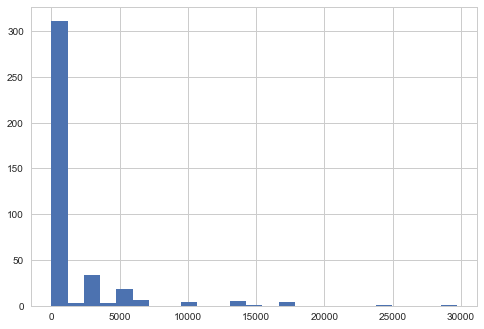

In [44]:
null_values = pd.DataFrame(sorted(train_merge.isnull().sum()))
plt.hist(null_values, bins=25);

no_train_features = train_merge.shape[1]
no_train_missing = train_merge.shape[1] - train_merge.dropna(axis=1).shape[1]

print("From {} features, {} having missing values. Thats {}% of them.".format(
        no_train_features, no_train_missing, round(no_train_missing/no_train_features*100),2))

<p>Looking at the histogram we can see that there are some features with show very high missing value counts. We should investigate this more.</p>
<p>We can look how much percent of the values are actually missing and what features are those.</p>

In [45]:
total = train_merge.isnull().sum().sort_values(ascending=False)
perc = (train_merge.isnull().sum()/train_merge.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, perc], axis=1, keys=['Total Missing', 'Percent'])
#print(missing_data["Percent"][missing_data["Percent"]>0][:25])
#plt.hist(missing_data["Percent"][missing_data["Percent"]>0], bins=25);

#grouping features based on missing values
mt50 = missing_data["Percent"][missing_data["Percent"]>0.5]
mt25 = missing_data["Percent"][(missing_data["Percent"]>0.25) & (missing_data["Percent"]<0.5)]
mt10 = missing_data["Percent"][(missing_data["Percent"]>0.1) & (missing_data["Percent"]<0.25)]
mt5 = missing_data["Percent"][(missing_data["Percent"]>0.05) & (missing_data["Percent"]<0.1)]
lt5 = missing_data["Percent"][missing_data["Percent"]<0.05] 

print("Features with more than 50% missing values: {}".format(len(mt50)))
print("Those are: ")
for i,ind in enumerate(mt50.index):
    print("{} with {}% missing.".format(ind, round(mt50[i]*100,2)))
print("\n")
print("Features with more than 25% missing values: {}".format(len(mt25)))
print("Those are: ")
for i,ind in enumerate(mt25.index):
    print("{} with {}% missing.".format(ind, round(mt25[i]*100,2)))
print("\n")
print("Features with more than 10% missing values: {}".format(len(mt10)))
for i,ind in enumerate(mt10.index):
    print("{} with {}% missing.".format(ind, round(mt10[i]*100,2)))
print("\n")
print("Features with more than 5% missing values: {}".format(len(mt5)))
print("Features with less than 5% missing values: {}".format(len(lt5)))

Features with more than 50% missing values: 6
Those are: 
provision_retail_space_modern_sqm with 97.53% missing.
provision_retail_space_sqm with 81.65% missing.
students_reg_sports_share with 55.47% missing.
museum_visitis_per_100_cap with 55.47% missing.
theaters_viewers_per_1000_cap with 55.47% missing.
load_of_teachers_preschool_per_teacher with 55.47% missing.


Features with more than 25% missing values: 10
Those are: 
hospital_beds_raion with 47.39% missing.
build_year with 44.65% missing.
state with 44.5% missing.
cafe_sum_500_max_price_avg with 43.59% missing.
cafe_sum_500_min_price_avg with 43.59% missing.
cafe_avg_price_500 with 43.59% missing.
material with 31.41% missing.
kitch_sq with 31.41% missing.
num_room with 31.41% missing.
max_floor with 31.41% missing.


Features with more than 10% missing values: 61
preschool_quota with 21.95% missing.
school_quota with 21.94% missing.
cafe_avg_price_1000 with 21.41% missing.
cafe_sum_1000_max_price_avg with 21.41% missing.
cafe_s

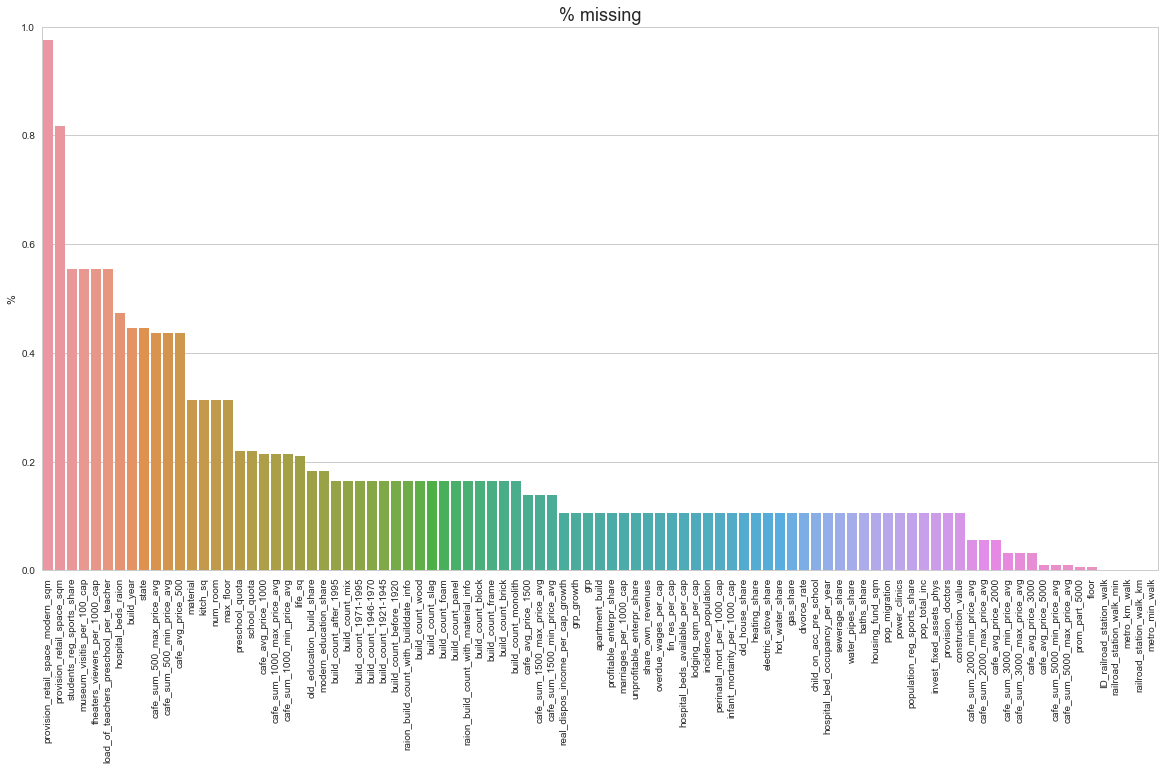

In [46]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x=perc[perc > 0].index, y=perc[perc > 0]);
plt.title("% missing", fontsize=18)
plt.ylabel("%")
plt.ylim(0,1);

<p>Ok, lets quickly look at the test.csv and if more or less the same features show high missing value counts</p>

From 391 features, 114 having missing values. Thats 29% of them.


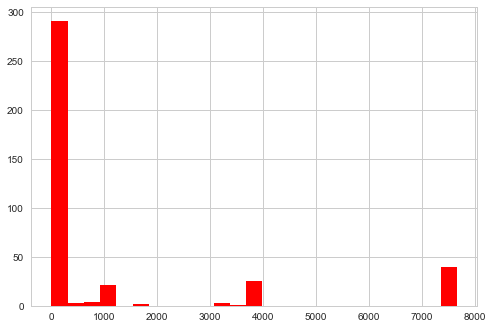

In [47]:
null_values = pd.DataFrame(sorted(test_merge.isnull().sum()))
plt.hist(null_values, bins=25, color="red");

no_test_features = train_merge.shape[1]
no_test_missing = train_merge.shape[1] - test_merge.dropna(axis=1).shape[1]

print("From {} features, {} having missing values. Thats {}% of them.".format(
        no_test_features, no_test_missing, round(no_test_missing/no_test_features*100),2))

In [48]:
test_total = test_merge.isnull().sum().sort_values(ascending=False)
test_perc = (test_merge.isnull().sum()/test_merge.isnull().count()).sort_values(ascending=False)
missing_tdata = pd.concat([test_total, test_perc], axis=1, keys=['Total Missing', 'Percent'])
#print(missing_data["Percent"][missing_data["Percent"]>0][:25])
#plt.hist(missing_data["Percent"][missing_data["Percent"]>0], bins=25);

#grouping features based on missing values
tmt50 = missing_tdata["Percent"][missing_tdata["Percent"]>0.5]
tmt25 = missing_tdata["Percent"][(missing_tdata["Percent"]>0.25) & (missing_tdata["Percent"]<0.5)]
tmt10 = missing_tdata["Percent"][(missing_tdata["Percent"]>0.1) & (missing_tdata["Percent"]<0.25)]
tmt5 = missing_tdata["Percent"][(missing_tdata["Percent"]>0.05) & (missing_tdata["Percent"]<0.1)]
tlt5 = missing_tdata["Percent"][missing_tdata["Percent"]<0.05]
missing_tdata
print("Features with more than 50% missing values: {}".format(len(tmt50)))
print("Those are: ")
for i,ind in enumerate(tmt50.index):
    print("{} with {}% missing.".format(ind, round(tmt50[i]*100,2)))
print("\n")
print("Features with more than 25% missing values: {}".format(len(tmt25)))
print("Those are: ")
for i,ind in enumerate(tmt25.index):
    print("{} with {}% missing.".format(ind, round(tmt25[i]*100,2)))
print("\n")
print("Features with more than 10% missing values: {}".format(len(tmt10)))
for i,ind in enumerate(tmt10.index):
    print("{} with {}% missing.".format(ind, round(tmt10[i]*100,2)))
print("\n")
print("Features with more than 5% missing values: {}".format(len(tmt5)))
print("Features with less than 5% missing values: {}".format(len(tlt5)))

Features with more than 50% missing values: 65
Those are: 
unprofitable_enterpr_share with 100.0% missing.
sewerage_share with 100.0% missing.
incidence_population with 100.0% missing.
perinatal_mort_per_1000_cap with 100.0% missing.
infant_mortarity_per_1000_cap with 100.0% missing.
share_own_revenues with 100.0% missing.
old_house_share with 100.0% missing.
heating_share with 100.0% missing.
electric_stove_share with 100.0% missing.
hot_water_share with 100.0% missing.
gas_share with 100.0% missing.
baths_share with 100.0% missing.
divorce_rate with 100.0% missing.
water_pipes_share with 100.0% missing.
lodging_sqm_per_cap with 100.0% missing.
housing_fund_sqm with 100.0% missing.
overdue_wages_per_cap with 100.0% missing.
fin_res_per_cap with 100.0% missing.
pop_total_inc with 100.0% missing.
pop_migration with 100.0% missing.
marriages_per_1000_cap with 100.0% missing.
invest_fixed_assets_phys with 100.0% missing.
profitable_enterpr_share with 100.0% missing.
construction_value wit

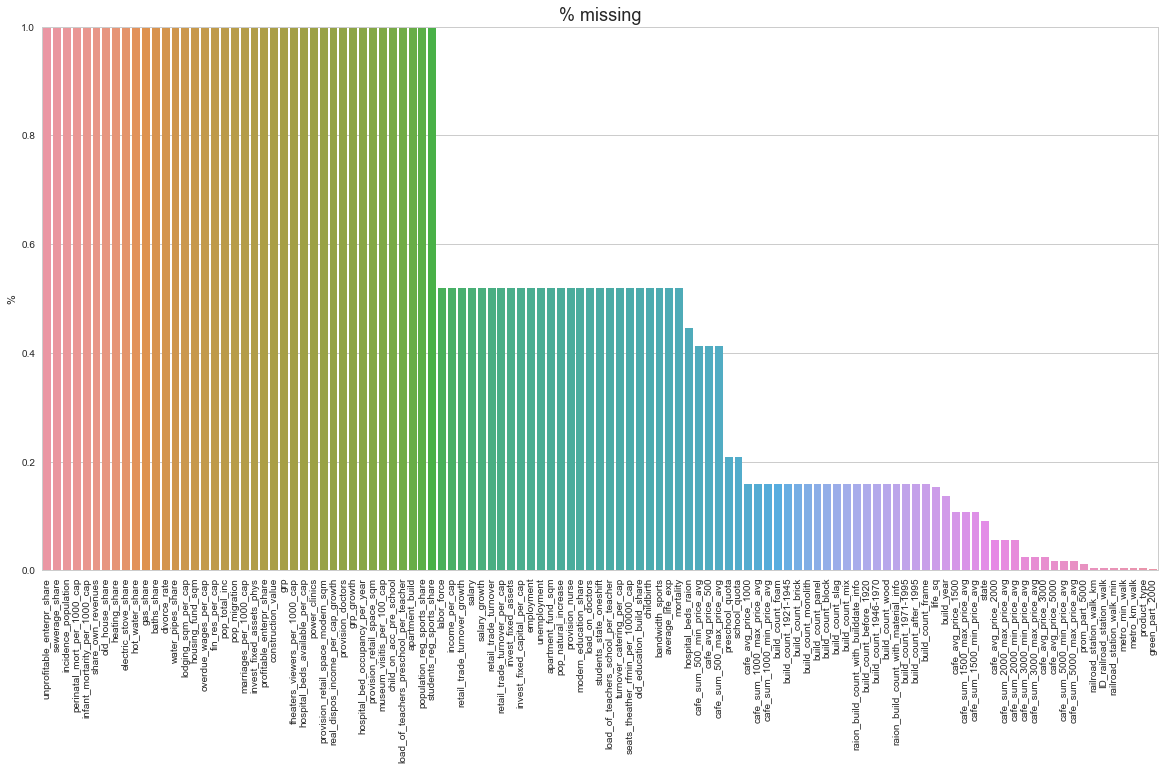

In [49]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x=test_perc[test_perc > 0].index, y=test_perc[test_perc > 0]);
plt.title("% missing", fontsize=18)
plt.ylabel("%")
plt.ylim(0,1);

<p>So there are some features with a lot of missing values, which are probably important for the house price.</p>
<p>When we look at the features we have basically 3 types of features:</p>
<ul>
    <li><p>Features of the house itself (e.g. *num_room*).</P></li>
    <li><p>Features of the neighbourhood (e.g. *oil_chemistry_*).</P></li>
    <li><p>Features of Russia's economy (e.g. *gdp_annual*).</P></li>
</ul>
<p>Features of the house itself are probably most important for price predictions, therefore I will carefully look at those. Those features are:</p>
<ul>
    <li><p>**price_doc**: This is our target variable, the housing price in rubel.</P></li>
    <li><p>**id**: This is the id of the house. This is not important and we can drop it.</P></li>
    <li><p>**full_sq**: This are the total m² of the house.</P></li>
    <li><p>**life_sq**: This are the living room m².</P></li>
    <li><p>**floor**: This is only for apartments and shows the floor on which the apartment is.</P></li>
    <li><p>**max_floor**: The max floor of the building the apartment is in.</P></li>
    <li><p>**material**: The material of the walls:
    <ol>
        <li><p>panel</p></li>
        <li><p>brick</p></li>
        <li><p>wood</p></li>
        <li><p>mass concrete</p></li>
        <li><p>breezeblock</p></li>
        <li><p>mass concrete plus brick</p></li>
    </ol><p></p>
    <li><p>**build_year**: The year in which the house was (will be) build. (*This can also be in the future*)</P></li>
    <li><p>**kitch_sq**: This are the kitchen m².</P></li>
    <li><p>**num_room**: number of living rooms</P></li>
    <li><p>**state**: The state in which the house is (4 best, 1 worst).</P></li>
    <li><p>**product_type**: owner-occupier purchase or investment.</P></li>
    <li><p>**sub_area**: name of the district.</P></li>
</ul>
<p>Let's have a closer look at those. So we have continous numeric features:</p>
<ul><li><p>price_doc, full_sq, life_sq, kitch_sq</p></li></ul>
<p>some discrete numeric features:</p>
<ul><li><p>floor, max_floor, build_year, num_room</p></li></ul>
<p>and some categorical</p>
<ul><li><p>material, product_type, sub_area and state</p></li></ul>

<p>Lets explore them</p>

### Continous Feature Cleaning

In [50]:
cont_train = train_merge[["price_doc","full_sq", "life_sq","kitch_sq"]]
cont_test = test_merge[["full_sq", "life_sq","kitch_sq"]]

disc_train = train_merge[["floor", "max_floor", "build_year", "num_room"]]
disc_test = test_merge[["floor", "max_floor", "build_year", "num_room"]]

cat_train = train_merge[["material", "state", "product_type", "sub_area"]]
cat_test = test_merge[["material", "state", "product_type", "sub_area"]]

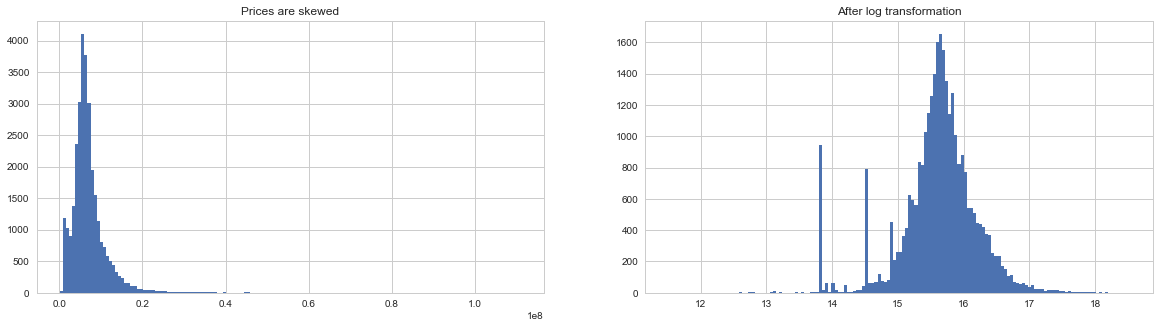

In [51]:
fig = plt.figure(figsize(20,5))
plt.subplot(121)
plt.title("Prices are skewed")
plt.hist(cont_train["price_doc"],bins = 150);
plt.subplot(122)
plt.title("After log transformation")
plt.hist(np.log1p(cont_train["price_doc"]),bins = 150);

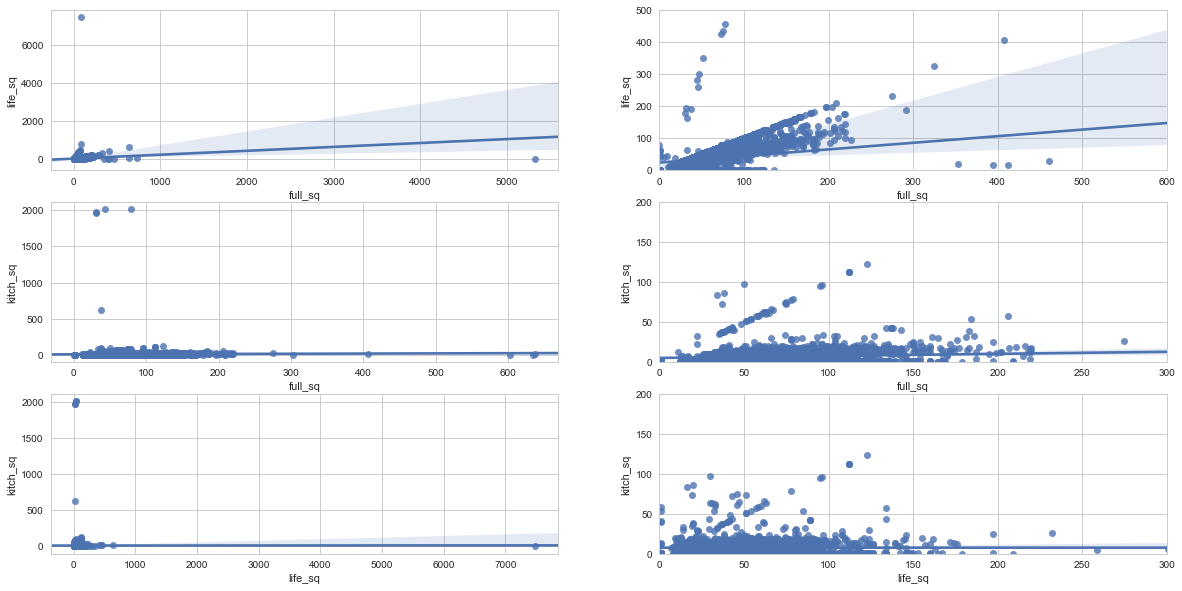

In [52]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.regplot(cont_train["full_sq"], cont_train["life_sq"])
plt.subplot(322)
plt.xlim(0,600)
plt.ylim(0,500)
sns.regplot(cont_train["full_sq"], cont_train["life_sq"])
plt.subplot(323)
sns.regplot(cont_train["full_sq"], cont_train["kitch_sq"])
plt.subplot(324)
plt.xlim(0,300)
plt.ylim(0,200)
sns.regplot(cont_train["full_sq"], cont_train["kitch_sq"])
plt.subplot(325)
sns.regplot(cont_train["life_sq"], cont_train["kitch_sq"])
plt.subplot(326)
plt.xlim(0,300)
plt.ylim(0,200)
sns.regplot(cont_train["life_sq"], cont_train["kitch_sq"])

<p>A quick plot reveals some severe outliers, which we would like to reove.</p>
<p>When we look at the plots we can observe the following:</p>
<ol>
    <li><p>For some values ***life_sq > full_sq***.</p></li>
    <li><p>For some values ***kitch_sq > full_sq***.</p></li>
    <li><p>All three features show some outliers.</p></li>
    <li><p>The ratio of ***full_sq : life_sq*** seems to be terribly off for some cases.</p></li>
</ol>
<p>When we look at the features full_sq, life_sq and kitch_sq we can set up following rules: </p>
<ol>
    <li><p>full_sq >= life_sq > kitch_sq</p></li>
    <li><p>full_sq > 5 & life_sq > 5</p></li>
    <li><p>full_sq < 500</p></li>
    <li><p>life_sq < 500</p></li>
    <li><p>(kitch_sq >= 1 & full_sq < 15) or kitch_sq > 1</p></li>
    <li><p>life_sq/full_sq < 0.4</p></li>
</ol>
<p>I chose a cutoff of 5 m² since there are micro appartments with comparable sizes.</p>
<p>We will look at violation in detail and decide what to do.</p>


In [53]:
nonsense_fullsq = []
fullsq_too_big = []
kitchen_too_big = []
kitchen_too_small = []
life_too_big = []
no_life = []
fullsq_lifesq_ratio = []
test = []
meters = cont_train.drop("price_doc", axis=1)
meters.isnull().sum()
for i in range(len(meters)): 
    if meters.iloc[i]["full_sq"] < 5:
        nonsense_fullsq.append(i)
    if meters.iloc[i]["full_sq"] >500:
        fullsq_too_big.append(i)
    if meters.iloc[i]["life_sq"] > meters.iloc[i]["full_sq"] or\
    meters.iloc[i]["life_sq"] > 500: 
        life_too_big.append(i)
    if meters.iloc[i]["life_sq"] < 5:
        no_life.append(i)
    if meters.iloc[i]["kitch_sq"] >= meters.iloc[i]["full_sq"] or\
    (meters.iloc[i]["kitch_sq"] >= meters.iloc[i]["life_sq"] and meters.iloc[i]["life_sq"] > 5):
        kitchen_too_big.append(i)
    if (meters.iloc[i]["kitch_sq"] <= 1 and meters.iloc[i]["full_sq"] <= 15) or\
    meters.iloc[i]["kitch_sq"] < 2:
        kitchen_too_small.append(i)
    if meters.iloc[i]["full_sq"] > 0 and meters.iloc[i]["life_sq"] > 0:
        if meters.iloc[i]["life_sq"]/meters.iloc[i]["full_sq"] < 0.4:
            fullsq_lifesq_ratio.append(i)    

In [54]:
#deal with full_sq < 5 cases
for i in nonsense_fullsq:
    #if life_sq is a reasonable size it will replace full sq while being kept
    if meters.loc[i, "life_sq"] > 20:
        train_merge.loc[i, "full_sq"] = train_merge.loc[i, "life_sq"]
    #if kitch_sq is a reasonable size it will replace full sq while being dismissed    
    elif meters.loc[i, "kitch_sq"] > 20:
        train_merge.loc[i, "full_sq"] = train_merge.loc[i, "kitch_sq"]
        train_merge.loc[i, "kitch_sq"] = np.NaN

#deal with full_sq > 500 cases
for i in fullsq_too_big:
    train_merge.loc[i, "full_sq"] = np.NaN
            
#deal with kitchen too big cases
#ok looking through the values we can observe that there are some entries really large
#for instance row 10,368 got 2013. This is obviously an error 2013 looks much more like a building year
#So if the building year is a reasonable year set kitchen to NaN, otherwise replace building year before setting 
#kitchen to NaN
for i in kitchen_too_big:
    if meters.loc[i, "kitch_sq"] > 1900:
        if train_merge.loc[i, "build_year"] > 1900:
            train_merge.loc[i, "kitch_sq"] = np.NaN
        else: 
            train_merge.loc[i, "build_year"] = train_merge.loc[i, "kitch_sq"]
            train_merge.loc[i, "kitch_sq"] = np.NaN
    #in case the kitchen is as large or larger than full sq we will set the kitchen to NaN
    else:
        train_merge.loc[i, "kitch_sq"] = np.NaN

#deal with kitchen too small cases
#so when we have a very small flat it might be reasonable to assume that a kitchenlette is about 1 m² otherwise 
#a kitchen should be larger than 1 m². If this is not the case all values will be set to NaN
for i in kitchen_too_small:
    train_merge.loc[i, "kitch_sq"] = np.NaN
   
#no_life cases
#just set life to NaN
for i in no_life:
    train_merge.loc[i, "life_sq"] = np.NaN
#life too big cases
#ok so if the life is just a little bit larger than full sq (+ 10 m²) we will swap both variables
#otherwise lets set them to NaN for now
for i in life_too_big:
    if train_merge.loc[i, "full_sq"] > train_merge.loc[i, "life_sq"]:
        pass
    elif (train_merge.loc[i, "full_sq"] + 10) > train_merge.loc[i, "life_sq"]:
        train_merge.loc[i, "full_sq"], train_merge.loc[i, "life_sq"] = \
        train_merge.loc[i, "life_sq"], train_merge.loc[i, "full_sq"]
    else:
        train_merge.loc[i, "life_sq"] = np.NaN

#bad ratio
#lets for now just set life_sq to NaN
for i in fullsq_lifesq_ratio:
    train_merge.loc[i, "life_sq"] = np.NaN

<p>Ok so this should do it for the continous numeric features. However, before we move on lets visualize these again in order to see if the plots are looking better.</p>

,full_sq,life_sq,kitch_sq
count,30465.000000,23319.00000,14580.000000
mean,53.954341,34.74956,7.998903
std,21.814535,18.55572,2.768053
min,0.000000,8.00000,2.000000
25%,38.000000,20.00000,6.000000
50%,49.000000,30.00000,8.000000
75%,63.000000,43.00000,10.000000
max,461.000000,407.00000,57.000000


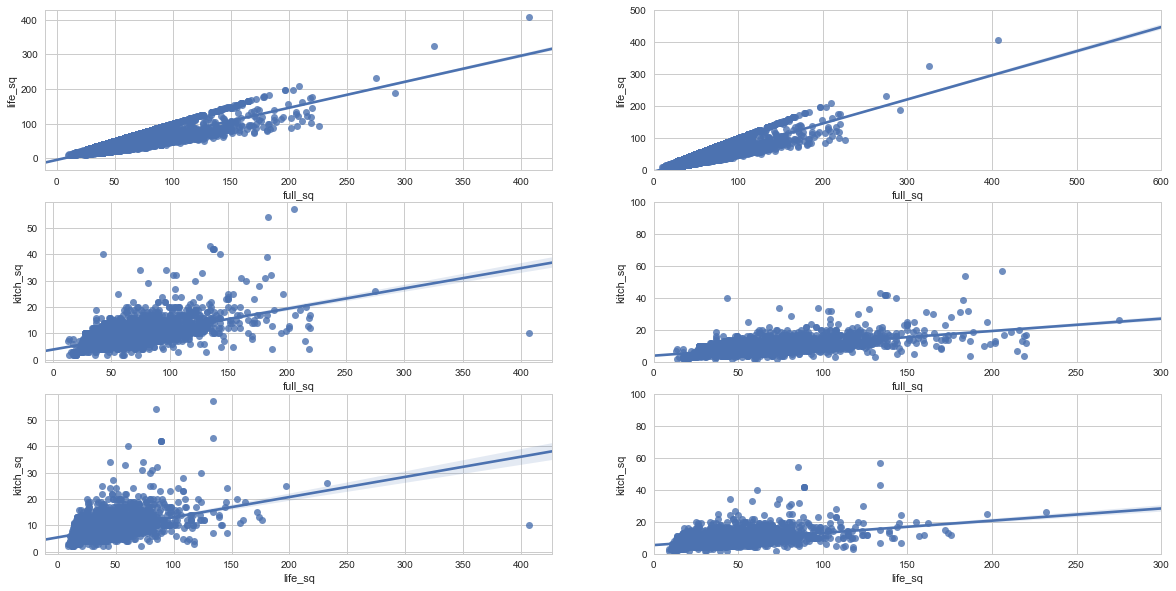

In [55]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.regplot(train_merge["full_sq"], train_merge["life_sq"]);
plt.subplot(322)
plt.xlim(0,600)
plt.ylim(0,500)
sns.regplot(train_merge["full_sq"], train_merge["life_sq"]);
plt.subplot(323)
sns.regplot(train_merge["full_sq"], train_merge["kitch_sq"]);
plt.subplot(324)
plt.xlim(0,300)
plt.ylim(0,100)
sns.regplot(train_merge["full_sq"], train_merge["kitch_sq"]);
plt.subplot(325)
sns.regplot(train_merge["life_sq"], train_merge["kitch_sq"]);
plt.subplot(326)
plt.xlim(0,300)
plt.ylim(0,100)
sns.regplot(train_merge["life_sq"], train_merge["kitch_sq"]);

display(train_merge[["full_sq", "life_sq", "kitch_sq"]].describe());

### Discrete Feature Cleaning
<p>So after we dealt with the continous numeric features lets have a look at the discrete features.n Again lets start with some basic exploration and visualization.</p>

In [56]:
disc_train.describe()

,floor,max_floor,build_year,num_room
count,30304.000000,20899.000000,1.686600e+04,20899.000000
mean,7.670803,12.558974,3.068057e+03,1.909804
std,5.319989,6.756550,1.543878e+05,0.851805
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.000000,9.000000,1.967000e+03,1.000000
50%,6.500000,12.000000,1.979000e+03,2.000000
75%,11.000000,17.000000,2.005000e+03,2.000000
max,77.000000,117.000000,2.005201e+07,19.000000


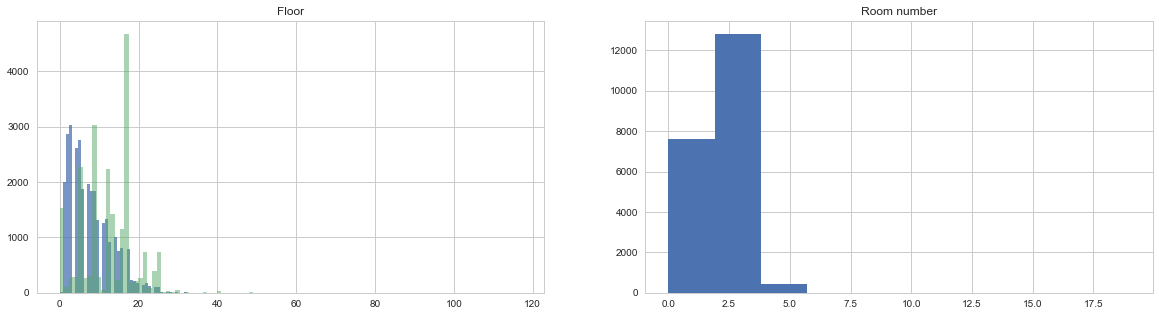

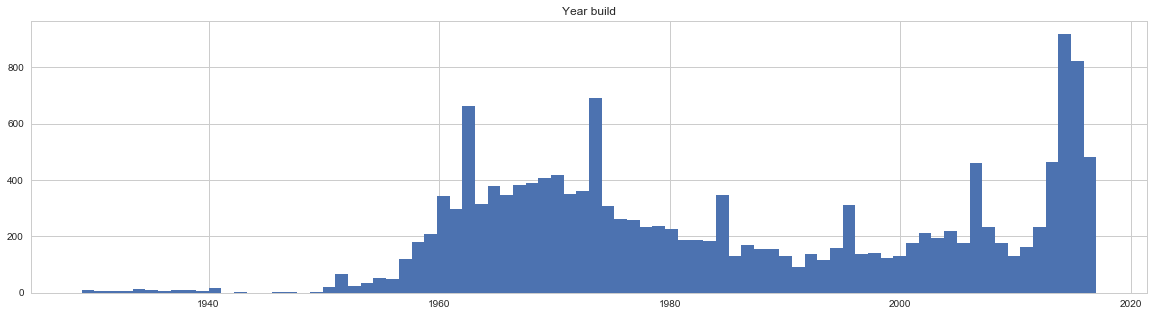

In [57]:
plt.figure()
plt.subplot(121)
plt.title("Floor")
plt.hist(disc_train["floor"].dropna(), bins=100, alpha = 0.75);
plt.hist(disc_train["max_floor"].dropna(), bins=100, alpha = 0.5);
plt.subplot(122)
plt.title("Room number")
plt.hist(disc_train["num_room"].dropna(), bins=10);
plt.figure()
plt.title("Year build")
plt.hist(sorted(disc_train["build_year"].dropna())[1000:-50], bins=80);

### Cleaning the discrete values
<p>Ok so there are some things to do:</p>
<ul><li><p>**Floors**</p>
        <ol>
            <li><p>The Oko1 tower is Moscow's highest skyscraper with 85 floors.
            This is the max value for floor and max_floor.</p></li>
            <li><p>The floor must not be larger than the max_floor value.</p>
            *After lookig at the values in detail it seems not likely that values were just swapped.*</li>
        </ol>
    </li><p></p>
    <li><p>**num_room**</p>
        <ol>
            <li><p>The room number should be larger than 0.</p></li>
            <li><p>We can also compare the room_num with life_sq. The average room size shouldn't be smaller than 4 m².</p></li>
        </ol>
    </li><p></p>
    <li><p>**build_year**</p>
        <ol>
            <li><p>There are two outlier which will be manually corrected.</p></li>
            <li><p>Values smaller than 1900 will be replaced with NaN.</p></li>
        </ol>
    </li>
</ul>

In [58]:
too_high = []
floors_swapped = []

too_old = []
too_young = []

no_rooms = []
too_small = []

for i in range(len(disc_train)):
    if disc_train.loc[i, "floor"] > 85:
        too_high.append(i)
    if disc_train.loc[i, "max_floor"] > 85:
        too_high.append(i)
    if disc_train.loc[i, "max_floor"] < disc_train.loc[i, "floor"]:
        floors_swapped.append(i)
    
    if disc_train.loc[i, "build_year"] < 1500:
        too_young.append(i)
    if disc_train.loc[i, "build_year"] > 2020:
        too_old.append(i)
        
    if disc_train.loc[i, "num_room"] == 0:
        no_rooms.append(i)
    if train_merge.loc[i, "life_sq"] > 0 and disc_train.loc[i, "num_room"] > 0:    
        if train_merge.loc[i, "life_sq"]/disc_train.loc[i, "num_room"] < 4:
            too_small.append(i)

In [59]:
train_merge.loc[too_high, ["max_floor"]] = np.NaN
train_merge.loc[floors_swapped, ["max_floor"]] = np.NaN

#I will replace the values manually but otherwise one should replace them with NaN
#train_merge.loc[too_old, ["build_year"]] = np.NaN
train_merge.loc[10089, "build_year"] = 2007
train_merge.loc[15220, "build_year"] = 1965
train_merge.loc[too_young, ["build_year"]] = np.NaN

train_merge.loc[no_rooms, ["num_room"]] = np.NaN
train_merge.loc[too_small, ["num_room"]] = np.NaN

,floor,max_floor,build_year,num_room
count,30304.000000,19402.000000,15964.000000,20881.000000
mean,7.670803,13.439491,1985.350727,1.908769
std,5.319989,5.995632,20.995743,0.832218
min,0.000000,0.000000,1691.000000,1.000000
25%,3.000000,9.000000,1968.000000,1.000000
50%,6.500000,14.000000,1981.000000,2.000000
75%,11.000000,17.000000,2006.000000,2.000000
max,77.000000,57.000000,2018.000000,9.000000


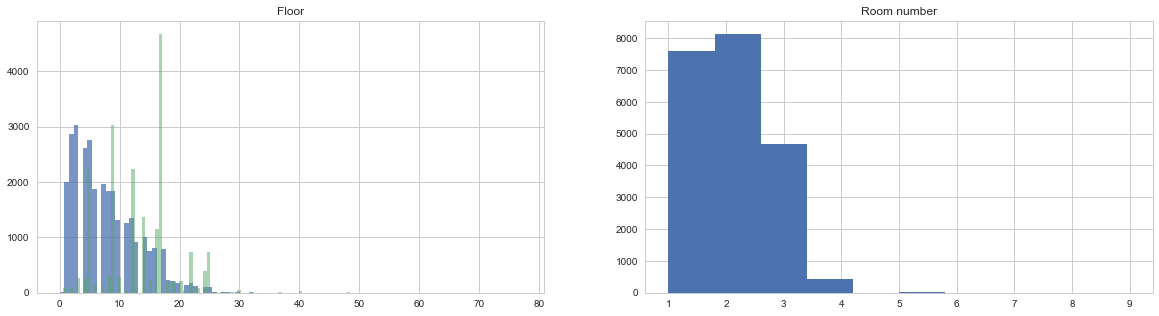

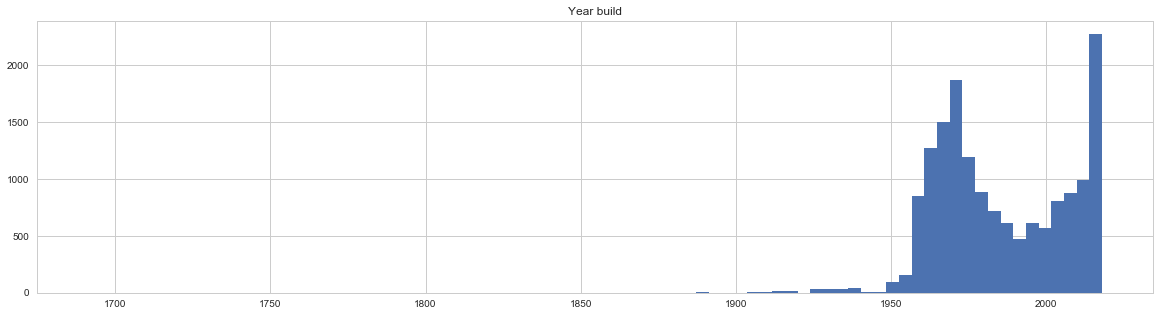

In [60]:
display(train_merge[["floor", "max_floor", "build_year", "num_room"]].describe())

plt.figure()
plt.subplot(121)
plt.title("Floor")
plt.hist(train_merge["floor"].dropna(), bins=100, alpha = 0.75);
plt.hist(train_merge["max_floor"].dropna(), bins=100, alpha = 0.5);
plt.subplot(122)
plt.title("Room number")
plt.hist(train_merge["num_room"].dropna(), bins=10);
plt.figure()
plt.title("Year build")

plt.hist(sorted(train_merge["build_year"].dropna()), bins=80);

 ### Categorical Feature Cleaning
 <p>So we have 4 categorical features that might need some cleaning. We know that there are 6 material types, 4 state types and 2 product types.</p>

In [61]:
for i in ["material", "state", "product_type"]:
    display(cat_train[i].value_counts())

1.0    14197
2.0     2993
5.0     1561
4.0     1344
6.0      803
3.0        1
Name: material, dtype: int64

2.0     5844
3.0     5790
1.0     4855
4.0      422
33.0       1
Name: state, dtype: int64

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

In [62]:
x = (cat_train["state"][cat_train["state"] == 33].index[0])
train_merge.loc[x, ["state"]] = 3

# Test data
### Ok lets quickly do the same things to the test data set

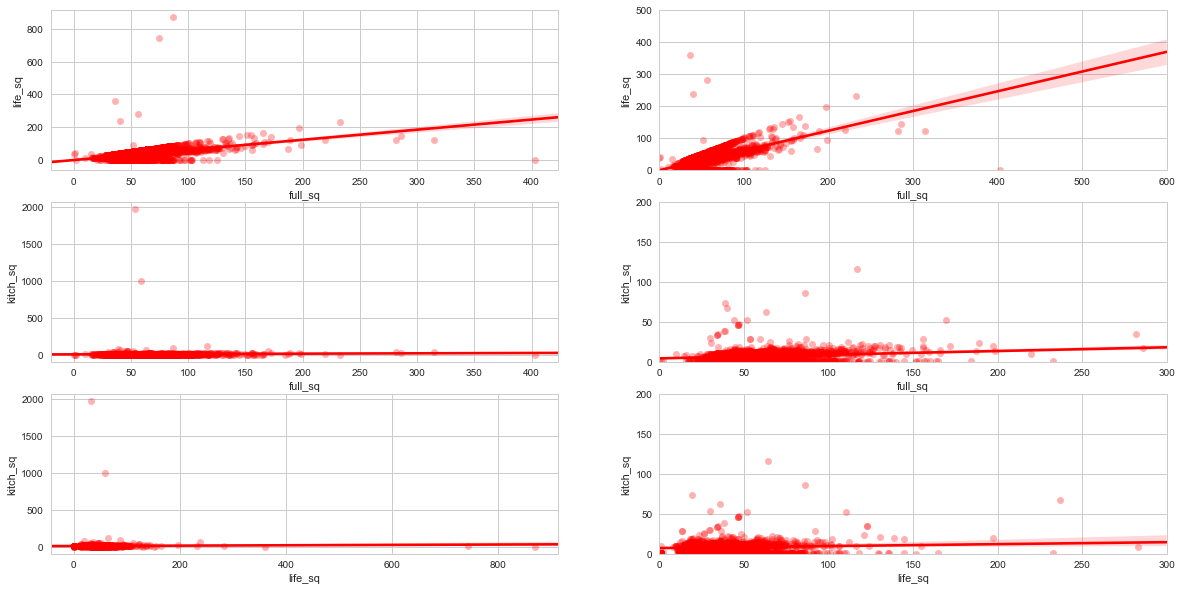

In [63]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.regplot(cont_test["full_sq"], cont_test["life_sq"], color = "red", scatter_kws={'alpha':0.3})
plt.subplot(322)
plt.xlim(0,600)
plt.ylim(0,500)
sns.regplot(cont_test["full_sq"], cont_test["life_sq"], color = "red", scatter_kws={'alpha':0.3})
plt.subplot(323)
sns.regplot(cont_test["full_sq"], cont_test["kitch_sq"], color = "red", scatter_kws={'alpha':0.3})
plt.subplot(324)
plt.xlim(0,300)
plt.ylim(0,200)
sns.regplot(cont_test["full_sq"], cont_test["kitch_sq"], color = "red", scatter_kws={'alpha':0.3})
plt.subplot(325)
sns.regplot(cont_test["life_sq"], cont_test["kitch_sq"], color = "red", scatter_kws={'alpha':0.3})
plt.subplot(326)
plt.xlim(0,300)
plt.ylim(0,200)
sns.regplot(cont_test["life_sq"], cont_test["kitch_sq"], color = "red", scatter_kws={'alpha':0.3})

In [64]:
test_nonsense_fullsq = []
test_fullsq_too_big = []
test_kitchen_too_big = []
test_kitchen_too_small = []
test_life_too_big = []
test_no_life = []
test_fullsq_lifesq_ratio = []

for i in range(len(cont_test)): 
    if cont_test.iloc[i]["full_sq"] < 5:
        test_nonsense_fullsq.append(i)
    if cont_test.iloc[i]["full_sq"] >500:
        test_fullsq_too_big.append(i)
    if cont_test.iloc[i]["life_sq"] > cont_test.iloc[i]["full_sq"] or\
    cont_test.iloc[i]["life_sq"] > 500: 
        test_life_too_big.append(i)
    if cont_test.iloc[i]["life_sq"] < 5:
        test_no_life.append(i)
    if cont_test.iloc[i]["kitch_sq"] >= cont_test.iloc[i]["full_sq"] or\
    (cont_test.iloc[i]["kitch_sq"] >= cont_test.iloc[i]["life_sq"] and cont_test.iloc[i]["life_sq"] > 5):
        test_kitchen_too_big.append(i)
    if (cont_test.iloc[i]["kitch_sq"] <= 1 and cont_test.iloc[i]["full_sq"] <= 15) or\
    cont_test.iloc[i]["kitch_sq"] < 2:
        test_kitchen_too_small.append(i)
    if cont_test.iloc[i]["full_sq"] > 0 and cont_test.iloc[i]["life_sq"] > 0:
        if cont_test.iloc[i]["life_sq"]/cont_test.iloc[i]["full_sq"] < 0.4:
            test_fullsq_lifesq_ratio.append(i)    

In [65]:
#deal with full_sq < 5 cases
for i in test_nonsense_fullsq:
    #if life_sq is a reasonable size it will replace full sq while being kept
    if cont_test.loc[i, "life_sq"] > 20:
        test_merge.loc[i, "full_sq"] = test_merge.loc[i, "life_sq"]
    #if kitch_sq is a reasonable size it will replace full sq while being dismissed    
    elif cont_test.loc[i, "kitch_sq"] > 20:
        test_merge.loc[i, "full_sq"] = test_merge.loc[i, "kitch_sq"]
        test_merge.loc[i, "kitch_sq"] = np.NaN

#deal with full_sq > 500 cases
for i in test_fullsq_too_big:
    test_merge.loc[i, "full_sq"] = np.NaN
            
#deal with kitchen too big cases
#ok looking through the values we can observe that there are some entries really large
#for instance row 10,368 got 2013. This is obviously an error 2013 looks much more like a building year
#So if the building year is a reasonable year set kitchen to NaN, otherwise replace building year before setting 
#kitchen to NaN
for i in test_kitchen_too_big:
    if cont_test.loc[i, "kitch_sq"] > 1900:
        if test_merge.loc[i, "build_year"] > 1900:
            test_merge.loc[i, "kitch_sq"] = np.NaN
        else: 
            test_merge.loc[i, "build_year"] = test_merge.loc[i, "kitch_sq"]
            test_merge.loc[i, "kitch_sq"] = np.NaN
    #in case the kitchen is as large or larger than full sq we will set the kitchen to NaN
    else:
        test_merge.loc[i, "kitch_sq"] = np.NaN

#deal with kitchen too small cases
#so when we have a very small flat it might be reasonable to assume that a kitchenlette is about 1 m² otherwise 
#a kitchen should be larger than 1 m². If this is not the case all values will be set to NaN
for i in test_kitchen_too_small:
    test_merge.loc[i, "kitch_sq"] = np.NaN
   
#no_life cases
#just set life to NaN
for i in test_no_life:
    test_merge.loc[i, "life_sq"] = np.NaN
#life too big cases
#ok so if the life is just a little bit larger than full sq (+ 10 m²) we will swap both variables
#otherwise lets set them to NaN for now
for i in test_life_too_big:
    if test_merge.loc[i, "full_sq"] > test_merge.loc[i, "life_sq"]:
        pass
    elif (test_merge.loc[i, "full_sq"] + 10) > test_merge.loc[i, "life_sq"]:
        test_merge.loc[i, "full_sq"], test_merge.loc[i, "life_sq"] = \
        test_merge.loc[i, "life_sq"], test_merge.loc[i, "full_sq"]
    else:
        test_merge.loc[i, "life_sq"] = np.NaN

#bad ratio
#lets for now just set life_sq to NaN
for i in test_fullsq_lifesq_ratio:
    test_merge.loc[i, "life_sq"] = np.NaN

,full_sq,life_sq,kitch_sq
count,30465.000000,23319.00000,14580.000000
mean,53.954341,34.74956,7.998903
std,21.814535,18.55572,2.768053
min,0.000000,8.00000,2.000000
25%,38.000000,20.00000,6.000000
50%,49.000000,30.00000,8.000000
75%,63.000000,43.00000,10.000000
max,461.000000,407.00000,57.000000


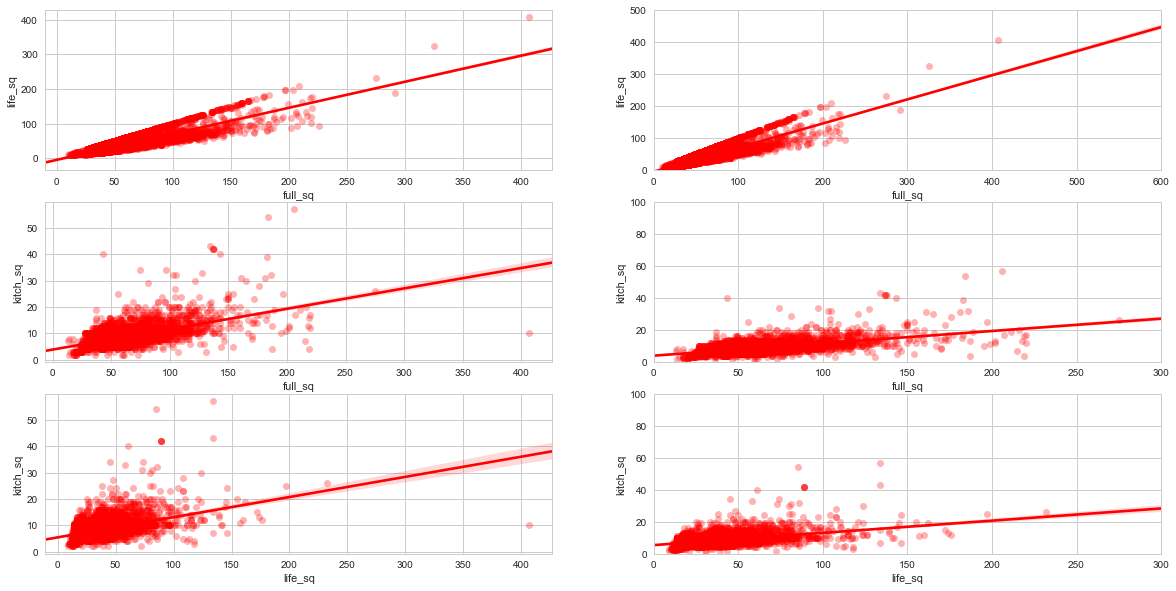

In [66]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.regplot(train_merge["full_sq"], train_merge["life_sq"], color = "red", scatter_kws={'alpha':0.3});
plt.subplot(322)
plt.xlim(0,600)
plt.ylim(0,500)
sns.regplot(train_merge["full_sq"], train_merge["life_sq"], color = "red", scatter_kws={'alpha':0.3});
plt.subplot(323)
sns.regplot(train_merge["full_sq"], train_merge["kitch_sq"], color = "red", scatter_kws={'alpha':0.3});
plt.subplot(324)
plt.xlim(0,300)
plt.ylim(0,100)
sns.regplot(train_merge["full_sq"], train_merge["kitch_sq"], color = "red", scatter_kws={'alpha':0.3});
plt.subplot(325)
sns.regplot(train_merge["life_sq"], train_merge["kitch_sq"], color = "red", scatter_kws={'alpha':0.3});
plt.subplot(326)
plt.xlim(0,300)
plt.ylim(0,100)
sns.regplot(train_merge["life_sq"], train_merge["kitch_sq"], color = "red", scatter_kws={'alpha':0.3});

display(train_merge[["full_sq", "life_sq", "kitch_sq"]].describe());

In [67]:
test_too_high = []
test_floors_swapped = []

test_too_old = []
test_too_young = []

test_no_rooms = []
test_too_small = []

for i in range(len(disc_test)):
    if disc_test.loc[i, "floor"] > 85:
        test_too_high.append(i)
    if disc_test.loc[i, "max_floor"] > 85:
        test_too_high.append(i)
    if disc_test.loc[i, "max_floor"] < disc_test.loc[i, "floor"]:
        test_floors_swapped.append(i)
    
    if disc_test.loc[i, "build_year"] < 1500:
        test_too_young.append(i)
    if disc_test.loc[i, "build_year"] > 2020:
        test_too_old.append(i)
        
    if disc_test.loc[i, "num_room"] == 0:
        test_no_rooms.append(i)
    if test_merge.loc[i, "life_sq"] > 0 and disc_test.loc[i, "num_room"] > 0:    
        if test_merge.loc[i, "life_sq"]/disc_test.loc[i, "num_room"] < 4:
            test_too_small.append(i)

In [68]:
test_merge.loc[test_too_high, ["max_floor"]] = np.NaN
test_merge.loc[test_floors_swapped, ["max_floor"]] = np.NaN

test_merge.loc[test_too_old, ["build_year"]] = np.NaN
test_merge.loc[test_too_young, ["build_year"]] = np.NaN

test_merge.loc[test_no_rooms, ["num_room"]] = np.NaN
test_merge.loc[test_too_small, ["num_room"]] = np.NaN

,floor,max_floor,build_year,num_room
count,7662.000000,7019.000000,6055.000000,7660.000000
mean,7.652571,13.666192,1988.625764,1.873629
std,5.099418,5.866484,21.899159,0.811176
min,1.000000,1.000000,1875.000000,1.000000
25%,4.000000,9.000000,1969.000000,1.000000
50%,7.000000,14.000000,1986.000000,2.000000
75%,11.000000,17.000000,2013.000000,2.000000
max,41.000000,48.000000,2019.000000,7.000000


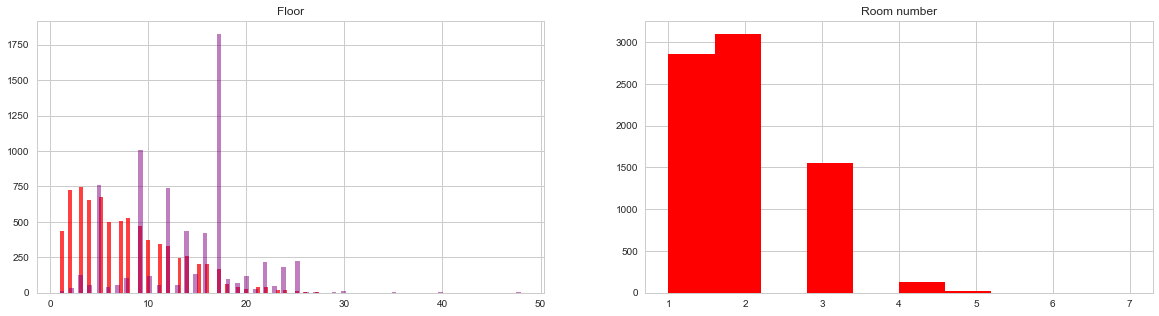

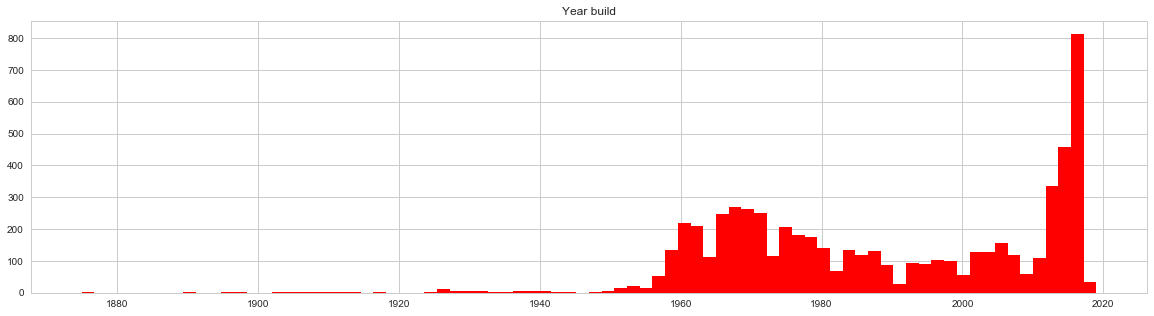

In [69]:
display(test_merge[["floor", "max_floor", "build_year", "num_room"]].describe())

plt.figure()
plt.subplot(121)
plt.title("Floor")
plt.hist(test_merge["floor"].dropna(), bins=100, color="red", alpha = 0.75);
plt.hist(test_merge["max_floor"].dropna(), bins=100, color="purple", alpha = 0.5);
plt.subplot(122)
plt.title("Room number")
plt.hist(test_merge["num_room"].dropna(), color="red", bins=10);
plt.figure()
plt.title("Year build")
plt.hist(sorted(test_merge["build_year"].dropna()), color="red", bins=80);

In [70]:
for i in ["material", "state", "product_type"]:
    display(cat_train[i].value_counts())

1.0    14197
2.0     2993
5.0     1561
4.0     1344
6.0      803
3.0        1
Name: material, dtype: int64

2.0     5844
3.0     5790
1.0     4855
4.0      422
33.0       1
Name: state, dtype: int64

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

# Some exploration of the cleaned data

### Correlation matrix 

In [74]:
x = (cont_train.columns)
x = x.append(disc_train.columns).append(cat_train.columns)

In [75]:
cor = train_merge[x].corr()

C:\Users\Wignand\Miniconda3\envs\py35\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.59553536  0.80332909  0.          0.          0.          0.          0.
  0.          0.          0.        ]
[ 0.47128877  0.71558542  0.51558162  0.          0.          0.          0.
  0.          0.          0.        ]
[ 0.3790164   0.42801054 -0.09967725  0.81438197  0.          0.          0.
  0.          0.          0.        ]
[ 0.11744721  0.0960893   0.0389104   0.28010974  0.94709953  0.          0.
  0.          0.          0.        ]
[ 0.13474532  0.15719381  0.02138476  0.51238453  0.44086623  0.70694805
  0.          0.          0.          0.        ]
[ 0.03789889  0.29813123  0.12551457  0.51935191  0.22027018  0.32432753
  0.68592553  0.          0.          0.        ]
[ 0.48787029  0.57647532 -0.01506943 -0.32827828 -0.03089293 -0.00537001
 -0.10994953  0.55551144  0.          0.        ]
[ 0.0640472  -0.00549693  0.04298396  0.15263221 -0.0638409  -0.07206601
 -0.05300773 -0.02005066  0.97889862  0.        ]
[ 0.12

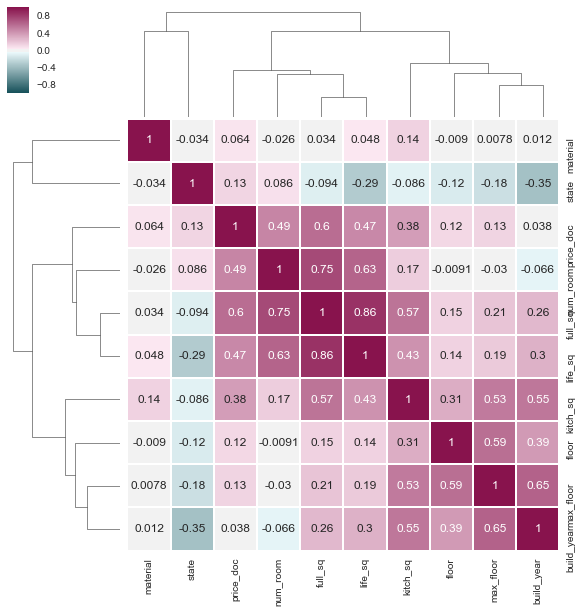

In [76]:
plt.figure(figsize=(10,10))
sns.clustermap(cor, square=True, linewidth=1, annot= True, cmap=cmap);
plt.xticks(rotation=45);
plt.yticks(rotation=0);

cholesky = np.linalg.cholesky(cor)
for i in cholesky:
    print(i)

### Categorical features
<p>***Material***</p>
<p>When we look at the categorical features we can see that the material does not show to high correlation with the target variable. Maybe material 2 shows slightly higher, while material 5 slightly lower prices.<p> 
<p>***State***</p>
<p>when we look at the state we can see a increase of the target variable with higher state.</p>
<p>***Product type***</p>
<p>Product types does not have too much of an influence on the price</p>

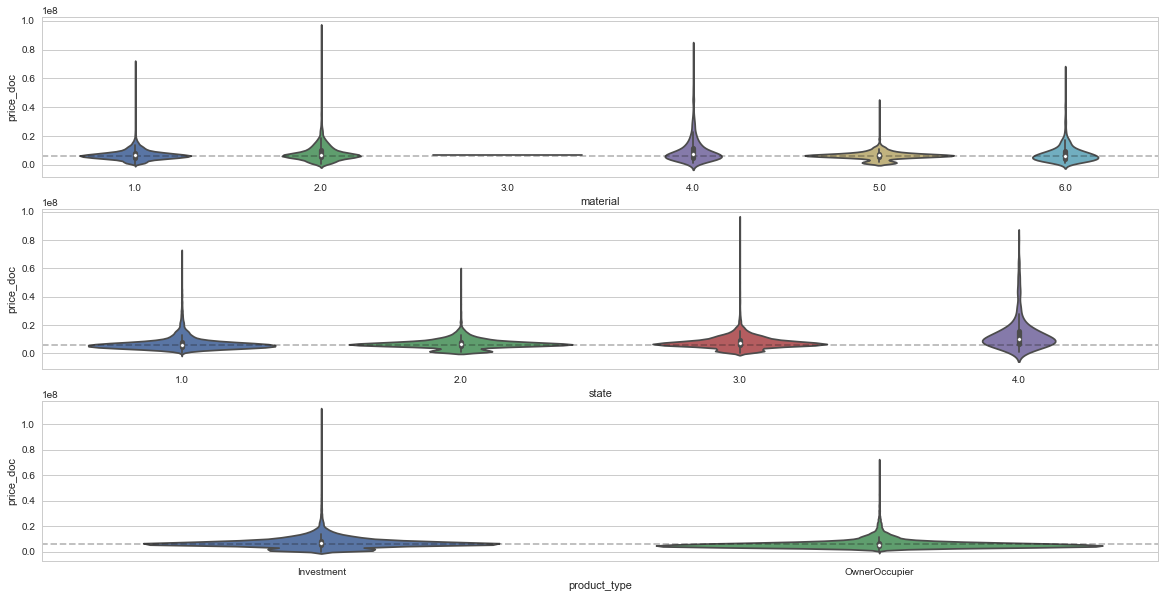

In [77]:
plt.figure(figsize=(20,10))
ax = plt.subplot(311)
sns.violinplot(x="material", y="price_doc", data=train_merge)
ax.hlines(np.median(train_merge["price_doc"]),-1,6, linestyle='--', alpha=0.3)
ax = plt.subplot(312)
sns.violinplot(x="state", y="price_doc", data=train_merge)
ax.hlines(np.median(train_merge["price_doc"]),-1,6, linestyle='--', alpha=0.3)
ax = plt.subplot(313)
sns.violinplot(x="product_type", y="price_doc", data=train_merge)
ax.hlines(np.median(train_merge["price_doc"]),-1,6, linestyle='--', alpha=0.3)

# Continous variables
<p>There are some obvious correlations between those. Lets look at them some more and maybe group them in a new variable, in order to reduce dimensionality.</p>

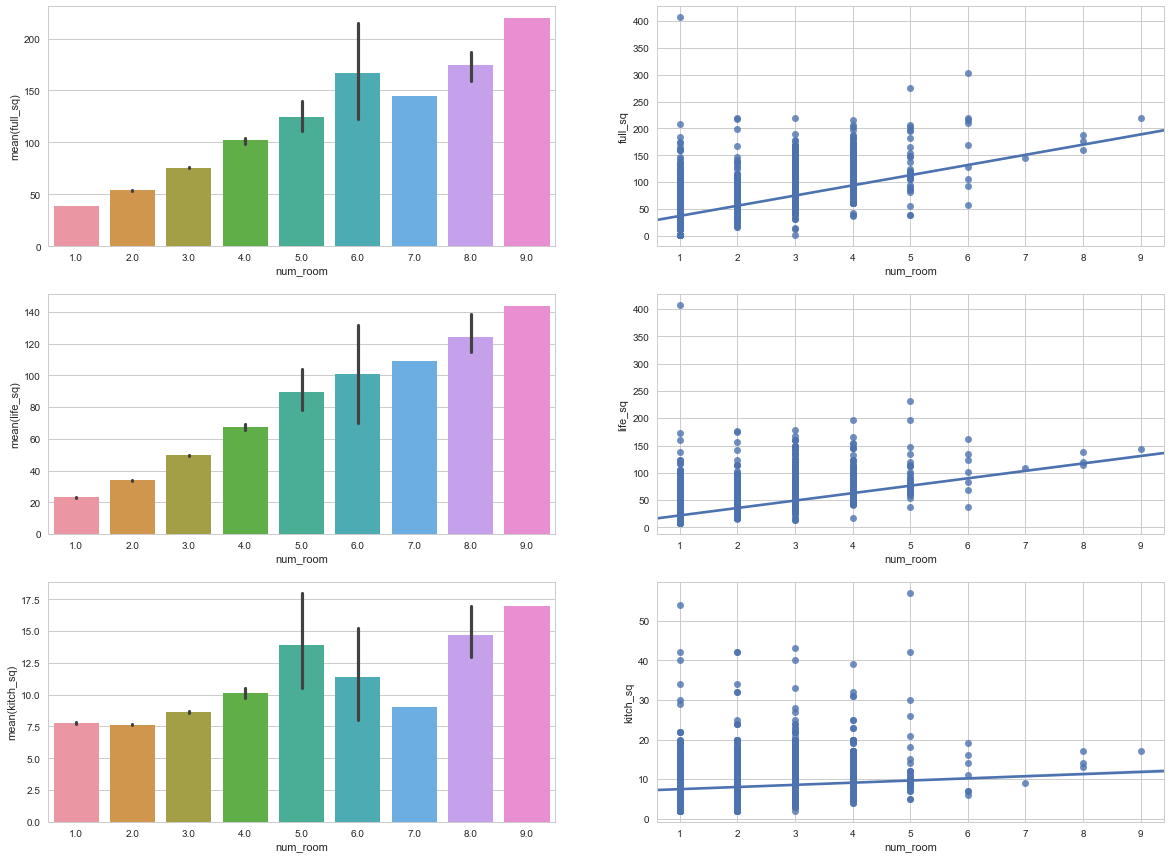

In [78]:
plt.figure(figsize=(20,15))
plt.subplot(321)
sns.barplot("num_room", "full_sq", data=train_merge)
plt.subplot(322)
sns.regplot("num_room", "full_sq", data=train_merge)
plt.subplot(323)
sns.barplot("num_room", "life_sq", data=train_merge)
plt.subplot(324)
sns.regplot("num_room", "life_sq", data=train_merge)
plt.subplot(325)
sns.barplot("num_room", "kitch_sq", data=train_merge)
plt.subplot(326)
sns.regplot("num_room", "kitch_sq", data=train_merge)

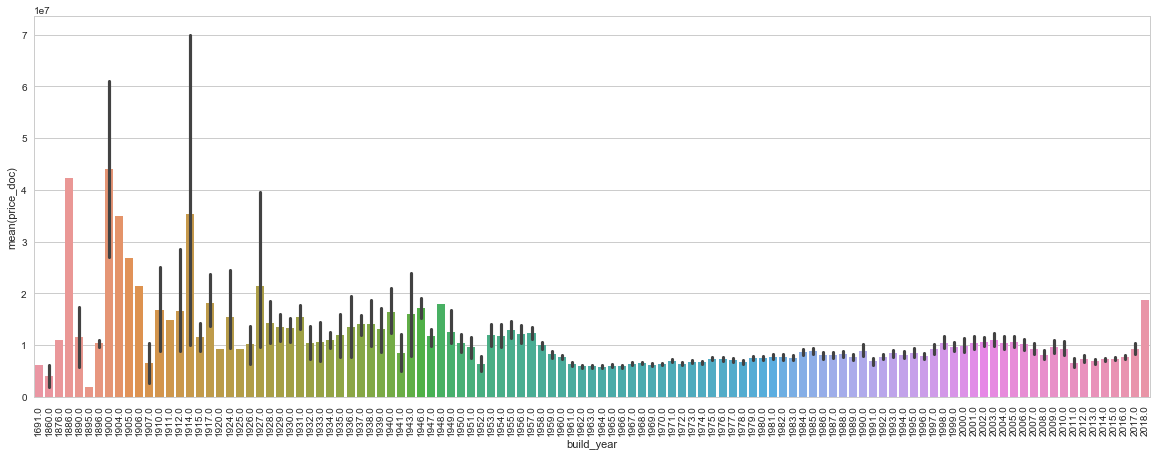

In [79]:
plt.figure(figsize=(20,7))
sns.barplot("build_year", "price_doc", data=train_merge);
plt.xticks(rotation=90);

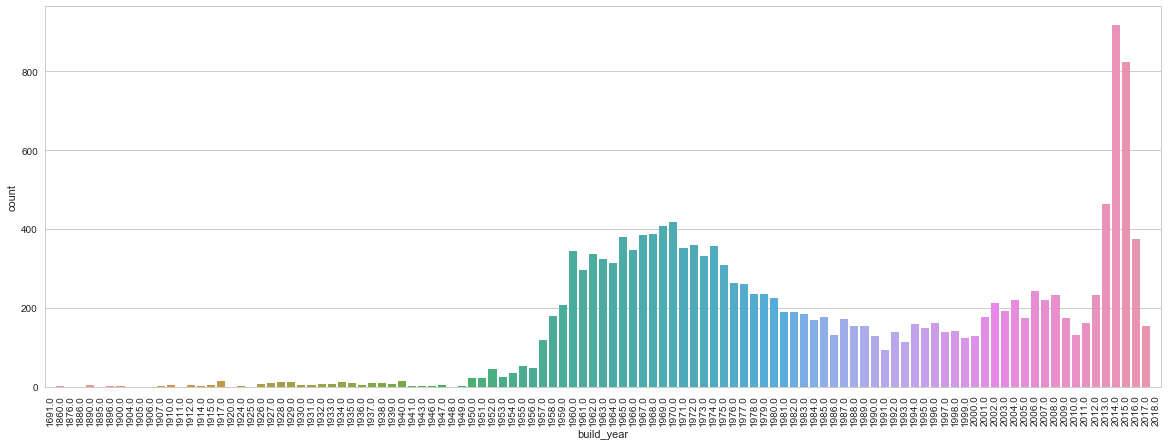

In [80]:
plt.figure(figsize=(20,7))
sns.countplot("build_year", data=train_merge);
plt.xticks(rotation=90);

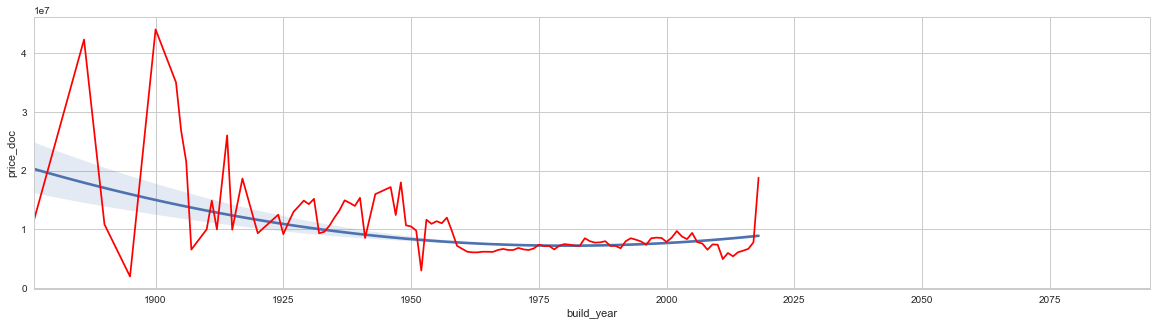

In [90]:
aver = train_merge.groupby("build_year")[["build_year", "price_doc"]].median()
recent = train_merge[["build_year", "price_doc"]][train_merge["build_year"] > 1850]
sns.regplot("build_year", "price_doc", data=recent, scatter=False, order=2,truncate=True)
plt.plot(aver["build_year"], aver["price_doc"], color ="red")

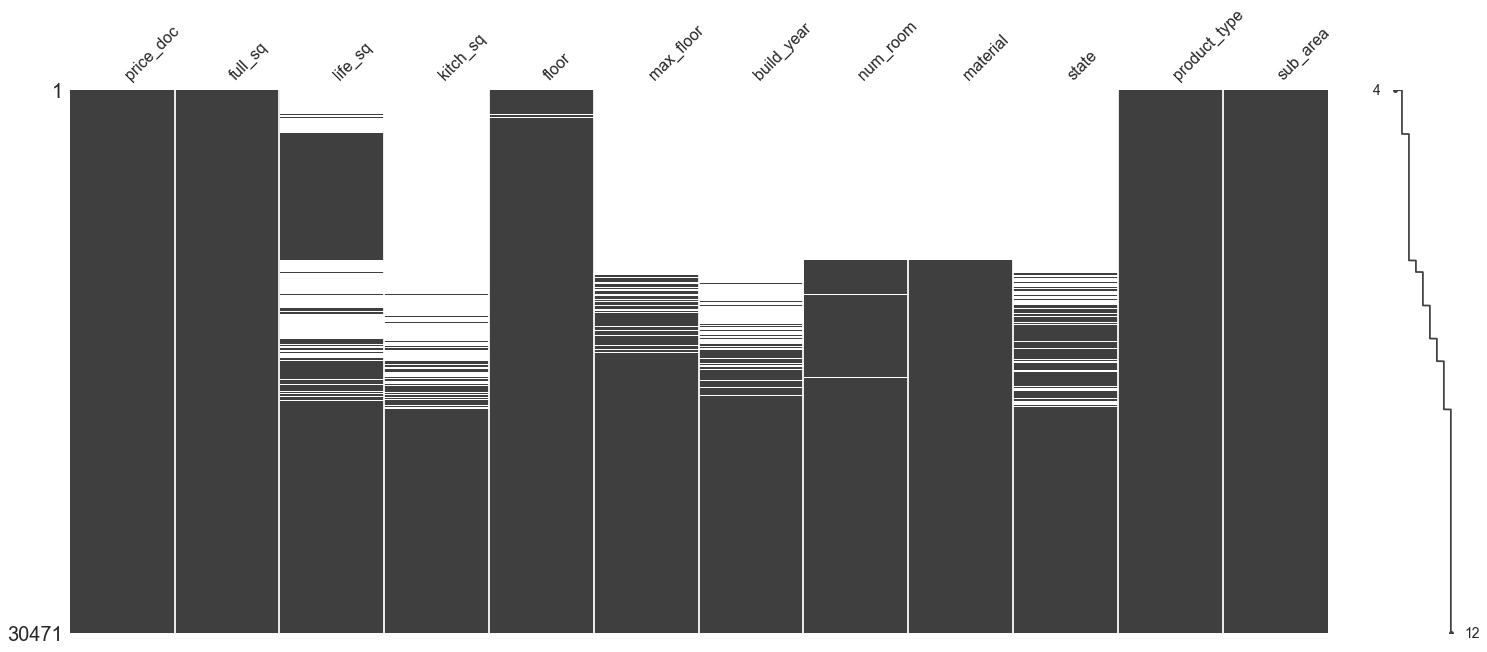

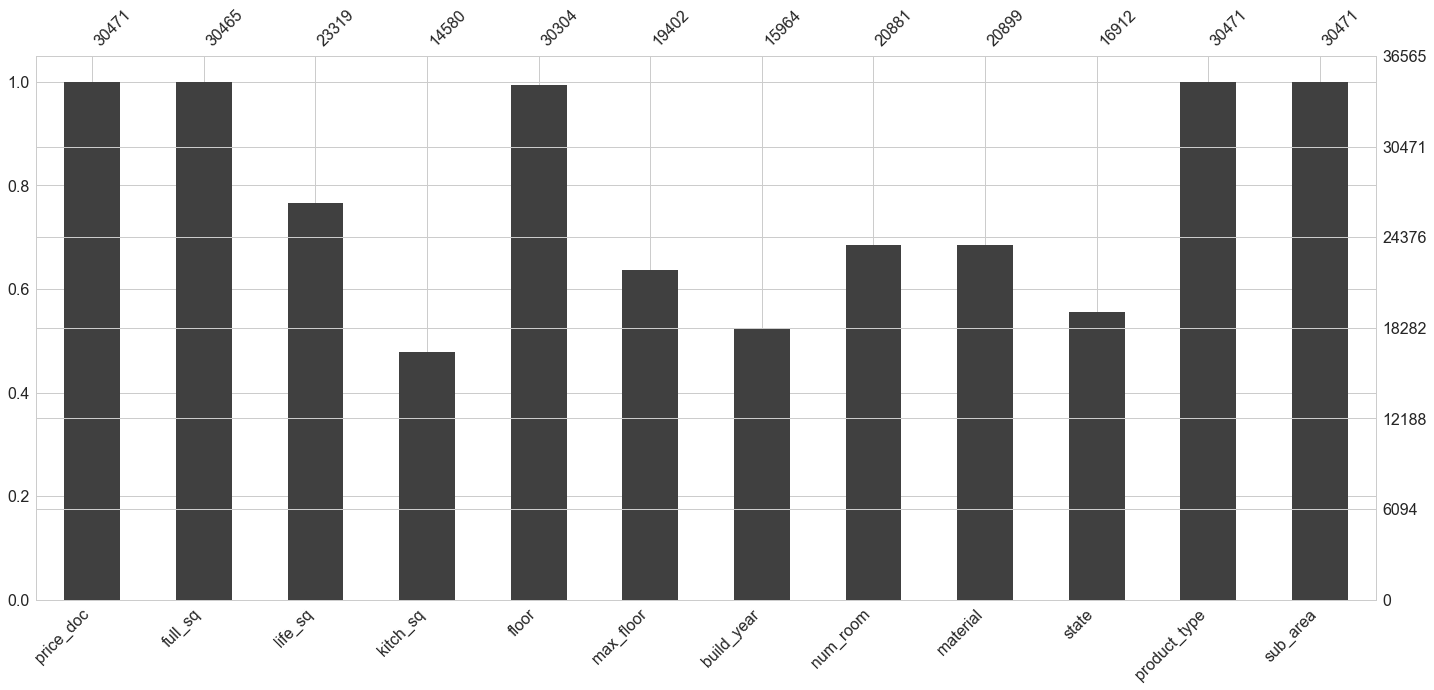

In [82]:
msn.matrix(train_merge[x], sort="ascending")
msn.bar(train_merge[x])

# Neighborhood features

In [221]:
neighborhood = train_merge.drop(['full_sq', 'life_sq', 'kitch_sq', 'floor', 'max_floor',
       'build_year', 'num_room', 'material', 'state', 'product_type', 'sub_area'], axis=1)

In [222]:
print(neighborhood.shape)

(30471, 380)


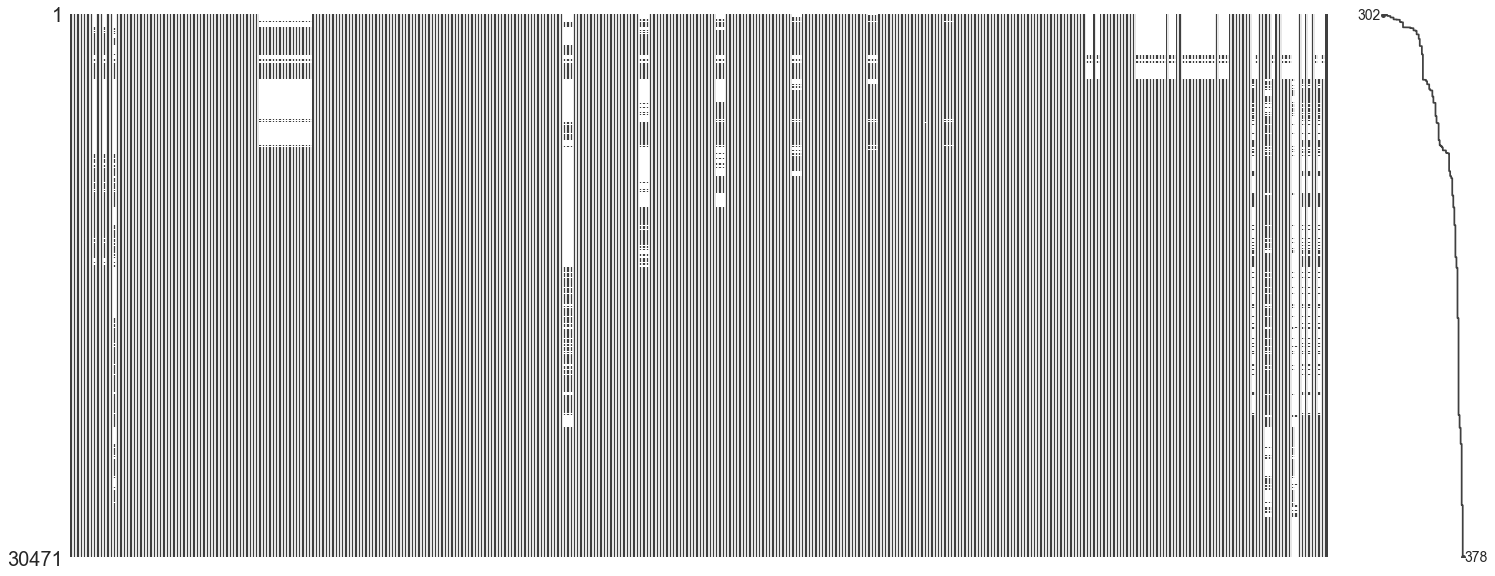

In [85]:
msn.matrix(neighborhood, sort="ascending")

In [86]:
obj = neighborhood.columns[neighborhood.dtypes == "object"]

display(neighborhood[obj].head())
neighborhood["old_education_build_share"].value_counts()

,timestamp,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,child_on_acc_pre_school,modern_education_share,old_education_build_share
0,2011-08-20,no,no,no,no,no,no,no,no,no,no,no,no,good,#!,NaN,NaN
1,2011-08-23,yes,no,no,no,no,no,no,no,no,no,no,no,excellent,#!,NaN,NaN
2,2011-08-27,no,no,no,no,yes,no,no,no,no,no,no,no,poor,#!,NaN,NaN
3,2011-09-01,no,no,no,no,no,no,no,no,no,no,no,no,good,#!,NaN,NaN
4,2011-09-05,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent,#!,NaN,NaN


25,47     13662
23,14      7978
8,2517     3239
Name: old_education_build_share, dtype: int64

In [87]:
#to drop time stamp 
#yes no -> encode 0, 1
#ecology also label encode (-> its ordinal)
#seemingly , has to be replaced with . in hild_on_acc_pre_school modern_education_share old_education_build_share

# Feature Reduction 

## I will try to reduce the dimensionality of this data sets with different techniques
### 1. PCA
### 2. XHBoost
### 3. ???

## Principal Component Analysis

### Ok so now lets attempt to reduce the dimensionality of the remaining features by applying a PCA.
### For the PCA to yield reliable results we have to do some data transformation first.

<ol>
    <li><p>Pick only continous features.</p></li>
    <li><p>Remove features which do not show any variance.</p></li>
    <li><p>Check data normality and normalize non normal data.</p></li>
    <li><p>Scale data.</p></li>
    <li><p>Label Encode ordinal variables</p></li>
</ol>

In [224]:
neighborhood.drop(["child_on_acc_pre_school", "modern_education_share", "old_education_build_share"], axis=1, inplace = True)

In [225]:
print (neighborhood.shape)

(30471, 377)


(30471, 205)


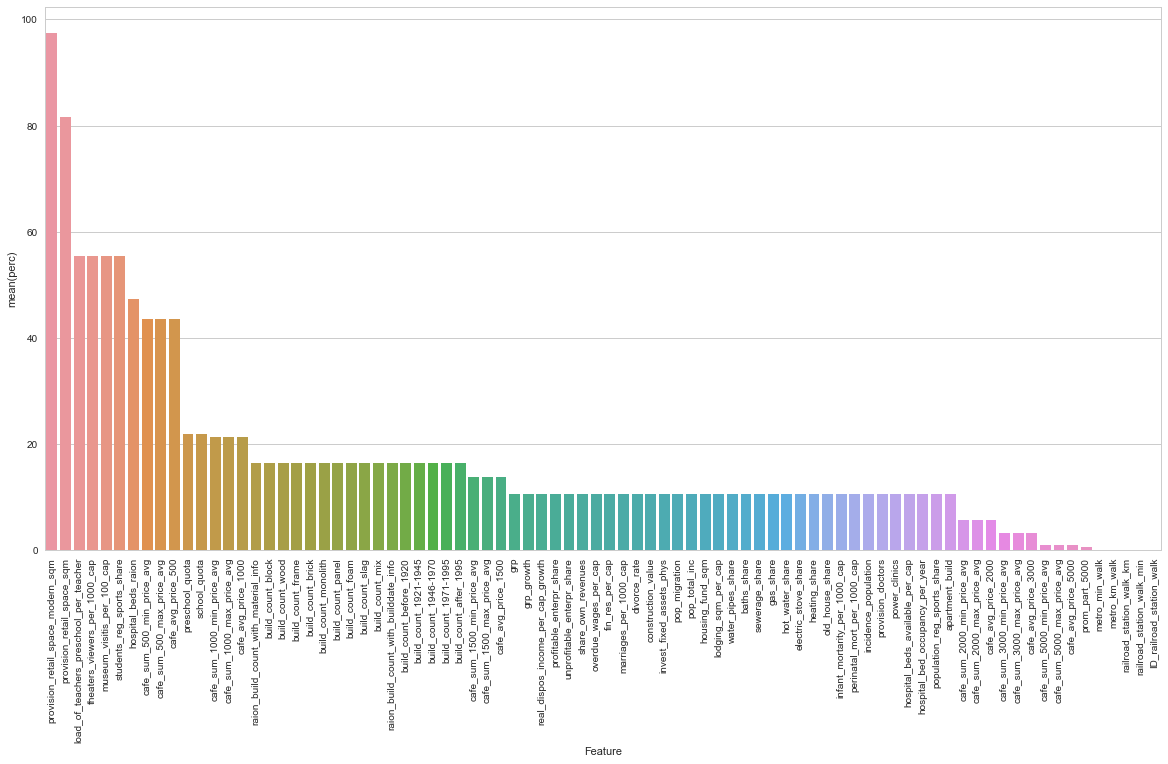

In [161]:
cont_neighbors = neighborhood.columns[neighborhood.dtypes == "float64"]
print(neighborhood[cont_neighbors].shape)

#sns.countplot();
m = neighborhood[cont_neighbors].isnull().sum()

test = zip(neighborhood[cont_neighbors].columns, m)
test = sorted(test, key = lambda x: x[1], reverse=True)
test = pd.DataFrame(test)
test.columns = ["Feature", "Missing"]
test = test[test["Missing"] > 0]
test["perc"] = test["Missing"]/len(train_merge)*100

plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(test["Feature"], test["perc"])


<p>Gonna drop features which show too much missing values. I will choose >20% missing as cutoff. The other features
are going to be imputed. I will first try a simple median impuation.</p>

In [226]:
test = test[test["perc"] > 20]
neighborhood.drop(test["Feature"], axis=1, inplace = True)

In [229]:
cont_neighbors = neighborhood.columns[neighborhood.dtypes == "float64"]
neighborhood.fillna(neighborhood[i].median, inplace=True)

In [232]:
neighborhood[cont_neighbors].shape

(30471, 123)

In [262]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

vt = VarianceThreshold()
vt.fit_transform(neighborhood[cont_neighbors])

#check normality
from scipy.stats import normaltest, shapiro
not_normal = []

for i in neighborhood[cont_neighbors]:
    if shapiro(log1p(neighborhood[i]))[1] > 0.1:
        not_normal.append(i)


C:\Users\Wignand\Miniconda3\envs\py35\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Wignand\Miniconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in log1p


In [265]:

not_normal

['gdp_quart_growth']

# Macro features